# Exploration
Just playing with the JHU data

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt
plt.style.use('dark_background')

In [21]:
data_dir = "../COVID-19/csse_covid_19_data/csse_covid_19_time_series/"

In [22]:
os.listdir(data_dir)

['time_series_19-covid-Recovered.csv',
 'time_series_19-covid-Deaths.csv',
 'README.md',
 '.gitignore',
 'time_series_19-covid-Confirmed.csv',
 '.ipynb_checkpoints']

In [23]:
conf = pd.read_csv(data_dir + "/time_series_19-covid-Confirmed.csv")
recovery = pd.read_csv(data_dir + "/time_series_19-covid-Recovered.csv")
deaths = pd.read_csv(data_dir + "/time_series_19-covid-Deaths.csv")

In [24]:
conf.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,NaN
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,414,414,418,418,422,426,428,428,429,NaN
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,NaN
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,296,296,296,296,296,296,296,296,296,NaN
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,102,119,120,124,124,125,0.0


In [25]:
dt.datetime.strptime("01/21/1995", "%m/%d/%Y")

datetime.datetime(1995, 1, 21, 0, 0)

In [26]:
def region_plot(region):
    """
    Takes in a region and plots the time series of confirmed cases
    """
    df = conf.drop(columns=['Province/State', 'Lat', 'Long']).groupby('Country/Region').sum()
    df = df.loc[region]
    
    df.plot()
    plt.title(region)
    plt.xlabel("Date")
    plt.ylabel("Count")
    plt.show()

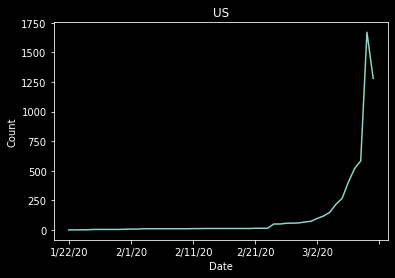

In [27]:
region_plot("US")

In [28]:
date_cols = conf.columns[4:]

In [47]:
conf[date_cols].sum(axis=0).to_json(orient='records')

'[555.0,653.0,941.0,1434.0,2118.0,2927.0,5578.0,6166.0,8234.0,9927.0,12038.0,16787.0,19881.0,23892.0,27635.0,30817.0,34391.0,37120.0,40150.0,42762.0,44802.0,45221.0,60368.0,66885.0,69030.0,71224.0,73258.0,75136.0,75639.0,76197.0,76823.0,78579.0,78965.0,79568.0,80413.0,81395.0,82754.0,84120.0,86011.0,88369.0,90306.0,92840.0,95120.0,97882.0,101789.0,105822.0,109795.0,113562.0,119303.0,125865.0]'

In [32]:
s = conf[date_cols].sum(axis=0) - deaths[date_cols].sum(axis=0) - recovery[date_cols].sum(axis=0)

In [53]:
df = s.to_frame().reset_index()

In [55]:
df.rename(columns={'index': 'date', 0:'count'})

,date,count
0,1/22/20,510.0
1,1/23/20,605.0
2,1/24/20,879.0
3,1/25/20,1353.0
4,1/26/20,2010.0
5,1/27/20,2784.0
6,1/28/20,5340.0
7,1/29/20,5907.0
8,1/30/20,7920.0
9,1/31/20,9492.0
